### Загрузка необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Постановка задачи

Федеральная сеть продуктовых магазинов насчитывает более 2500 точек на территории Российской Федерации. 
Все магазины имеют схожий ассортимент, площадь торговой точки, проводимые маркетинговые акции.
При этом разные точки продаж имеют разную эффективность (измеряемую в среднедневной выручке в рублях).
Руководство сети, при открытие нового магазина, хотело бы, чтобы данная точка продаж была высокоэффективной.
В связи с этим, вам поставлена задача, разработать математическую модель, предсказывающую по геоданным, эффективность потенциальной точки продаж. 

### Загрузка данных

In [3]:
df=pd.read_csv('geo_data_for_shops.csv', sep=';')
df.head()

city               subject  shop_id  latitude  longitude  \
0     Челябинск   Челябинская область        0     55.20      61.32   
1      Нелидово      Тверская область        1     56.22      32.78   
2  Магнитогорск   Челябинская область        2     53.36      58.98   
3  Нижний Тагил  Свердловская область        3     57.92      59.98   
4         Ясный  Оренбургская область        4     51.03      59.86   

   distance_adm_cent  count_population      pop_dens  count_shop_id_city  \
0           0.242023           1202371  85853.897282                 198   
1           3.218679             18883  20058.399036                   2   
2           3.210565            416521   3535.242035                  68   
3           1.354135            353950  53888.154445                  43   
4           4.717471             15675  11741.963646                   3   

   dist_shop_id   ...    min_dist_college  n_fast_food  min_dist_fast_food  \
0    179.159492   ...          438.349608          4.0          302.415150   
1    944.435000   ...         1405.587903          1.0          498.700195   
2    394.088234   ...         3675.615004          1.0          872.333209   
3    415.141219   ...          254.781300          0.0         1377.367103   
4    911.169747   ...         2023.939591          0.0            0.000000   

   n_food_court  min_dist_food_court  n_bank  min_dist_bank  n_fuel  \
0           0.0          3390.210263    13.0     226.596391     4.0   
1           0.0             0.000000     2.0     522.591733     1.0   
2           0.0             0.000000    10.0      93.918859     1.0   
3           0.0             0.000000     2.0     683.274601     1.0   
4           0.0             0.000000     0.0       0.000000     0.0   

   min_dist_fuel  sale_k  
0     135.597017       2  
1     926.549423       0  
2     685.207142       0  
3     286.745723       2  
4    1829.042732       0  

[5 rows x 67 columns]

In [4]:
df.columns

Index(['city', 'subject', 'shop_id', 'latitude', 'longitude',
       'distance_adm_cent', 'count_population', 'pop_dens',
       'count_shop_id_city', 'dist_shop_id', 'count_shop_id_km',
       'dist_competitor_1', 'dist_competitor_2', 'dist_competitor_3',
       'dist_competitor_4', 'min_dist_tertiary', 'min_dist_secondary',
       'min_dist_road', 'min_dist_primary', 'min_dist_footway',
       'n_traffic_signals', 'min_dist_traffic_signals', 'n_parking_space',
       'min_dist_parking_space', 'min_dist_parking', 'n_parking_entrance',
       'min_dist_parking_entrance', 'n_parking', 'n_bus_stop',
       'min_dist_bus_stop', 'n_tram_stop', 'min_dist_tram_stop',
       'n_apartments', 'min_dist_apartments', 'n_house', 'min_dist_house',
       'n_residential', 'min_dist_residential', 'n_dormitory',
       'min_dist_dormitory', 'n_terrace', 'min_dist_terrace', 'n_industrial',
       'min_dist_industrial', 'n_office', 'min_dist_office', 'n_cinema',
       'min_dist_cinema', 'n_marketplace'

### Данные

In [5]:
# Объем данных
df.shape

(2873, 67)

In [6]:
# Статистика
df.describe()

shop_id     latitude    longitude  distance_adm_cent  \
count  2873.000000  2873.000000  2873.000000        2873.000000   
mean   1436.000000    55.609154    52.064407           0.875066   
std     829.507987     2.549501    11.198454           1.227548   
min       0.000000    44.560000    28.270000           0.000000   
25%     718.000000    54.090000    41.010000           0.127293   
50%    1436.000000    55.460000    53.990000           0.268852   
75%    2154.000000    56.890000    60.620000           1.208869   
max    2872.000000    66.120000    77.780000           8.482116   

       count_population       pop_dens  count_shop_id_city  dist_shop_id  \
count      2.873000e+03    2873.000000         2873.000000   2873.000000   
mean       6.844876e+05   17869.098157           51.494257    574.280420   
std        7.383771e+05   17421.720292           56.079673    207.292747   
min        1.030000e+02       0.000000            1.000000     11.111000   
25%        9.513900e+04    4521.451780           10.000000    419.283857   
50%        4.165210e+05   13548.253248           31.000000    564.478168   
75%        1.120547e+06   25899.024821           71.000000    734.083177   
max        3.894284e+06  149934.150234          198.000000    999.372532   

       count_shop_id_km  dist_competitor_1     ...       min_dist_college  \
count       2873.000000        2873.000000     ...           2.873000e+03   
mean           2.426732         376.135366     ...           5.041175e+03   
std            1.602230         551.618631     ...           1.247854e+05   
min            1.000000           0.000000     ...           0.000000e+00   
25%            1.000000          89.579746     ...           4.629677e+02   
50%            2.000000         289.739432     ...           8.386098e+02   
75%            3.000000         531.705177     ...           1.482369e+03   
max           13.000000       16889.487519     ...           4.653862e+06   

       n_fast_food  min_dist_fast_food  n_food_court  min_dist_food_court  \
count  2873.000000        2.873000e+03   2873.000000          2873.000000   
mean      2.619561        4.172734e+03      0.047337          1523.625728   
std       4.273354        1.227741e+05      0.247243          2748.490796   
min       0.000000        0.000000e+00      0.000000             0.000000   
25%       0.000000        2.515118e+02      0.000000             0.000000   
50%       1.000000        5.833015e+02      0.000000             0.000000   
75%       3.000000        1.074047e+03      0.000000          2260.732945   
max      37.000000        4.654559e+06      3.000000         27027.539042   

            n_bank  min_dist_bank       n_fuel  min_dist_fuel       sale_k  
count  2873.000000   2.873000e+03  2873.000000   2.873000e+03  2873.000000  
mean      5.650191   4.417379e+03     1.614340   4.692935e+03     0.849983  
std       6.280842   1.248270e+05     1.614554   1.247194e+05     0.738972  
min       0.000000   0.000000e+00     0.000000   0.000000e+00     0.000000  
25%       2.000000   1.695915e+02     0.000000   4.595377e+02     0.000000  
50%       4.000000   3.387206e+02     1.000000   7.310462e+02     1.000000  
75%       7.000000   5.869007e+02     2.000000   1.050431e+03     1.000000  
max      54.000000   4.654402e+06     9.000000   4.652587e+06     2.000000  

[8 rows x 65 columns]

In [7]:
# Группировка по регионам
df.groupby(by='subject', as_index=False).count().sort_values(by='shop_id', ascending=False)

subject  city  shop_id  latitude  longitude  \
42                Челябинская область   379      379       379        379   
33               Свердловская область   339      339       339        339   
24            Республика Башкортостан   203      203       203        203   
15                 Московская область   193      193       193        193   
16              Нижегородская область   141      141       141        141   
22                      Пермский край   140      140       140        140   
39                  Тюменская область   109      109       109        109   
32                Саратовская область   109      109       109        109   
41  Ханты-Мансийский автономный округ    99       99        99         99   
28                Республика Удмуртия    75       75        75         75   
18                     Омская область    74       74        74         74   
31                  Самарская область    66       66        66         66   
8                   Кировская область    57       57        57         57   
12                    Курская область    53       53        53         53   
40                Ульяновская область    48       48        48         48   
30                  Рязанская область    47       47        47         47   
20                  Орловская область    47       47        47         47   
19               Оренбургская область    44       44        44         44   
2                Владимирская область    44       44        44         44   
14                   Липецкая область    43       43        43         43   
43               Чувашская Республика    41       41        41         41   
21                 Пензенская область    38       38        38         38   
38                   Тульская область    37       37        37         37   
36                 Тамбовская область    37       37        37         37   
11                 Курганская область    37       37        37         37   
5                 Воронежская область    34       34        34         34   
44    Ямало-Ненецкий автономный округ    33       33        33         33   
6                  Ивановская область    32       32        32         32   
1                    Брянская область    29       29        29         29   
25                Республика Марий Эл    28       28        28         28   
9                 Костромская область    26       26        26         26   
37                   Тверская область    25       25        25         25   
0                Белгородская область    25       25        25         25   
45                Ярославская область    25       25        25         25   
7                   Калужская область    25       25        25         25   
34                 Смоленская область    22       22        22         22   
17               Новгородская область    13       13        13         13   
26                Республика Мордовия    12       12        12         12   
4                 Вологодская область    12       12        12         12   
27               Республика Татарстан     9        9         9          9   
29                 Ростовская область     7        7         7          7   
3               Волгоградская область     6        6         6          6   
23                  Псковская область     4        4         4          4   
13              Ленинградская область     3        3         3          3   
10                 Краснодарский край     2        2         2          2   
35                Ставропольский край     1        1         1          1   

    distance_adm_cent  count_population  pop_dens  count_shop_id_city  \
42                379               379       379                 379   
33                339               339       339                 339   
24                203               203       203                 203   
15                193               193       193                 193   
16                141               141      

### Целевая переменая

In [8]:
# Количество магазинов в каждой категории
# 0 - низкая эффективность; 1 - средняя эффективность; 2 - высокая эффективность.

df.groupby(by='sale_k', as_index=False).count()[['sale_k', 'shop_id']]

sale_k  shop_id
0       0     1032
1       1     1240
2       2      601

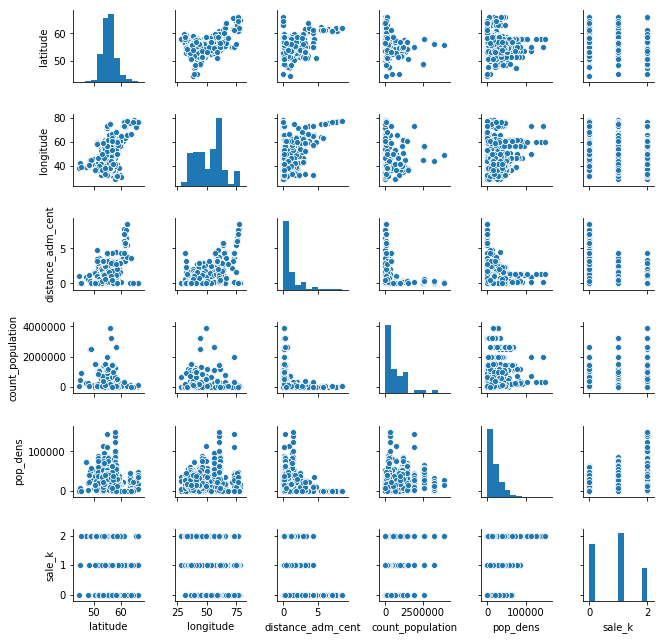

In [9]:
# Матрица графиков рассеяния геопризнаков и категории продаж
col=['latitude', 'longitude', 'distance_adm_cent',
       'count_population', 'pop_dens', 'sale_k']
sns.pairplot(df[col], size=1.5)

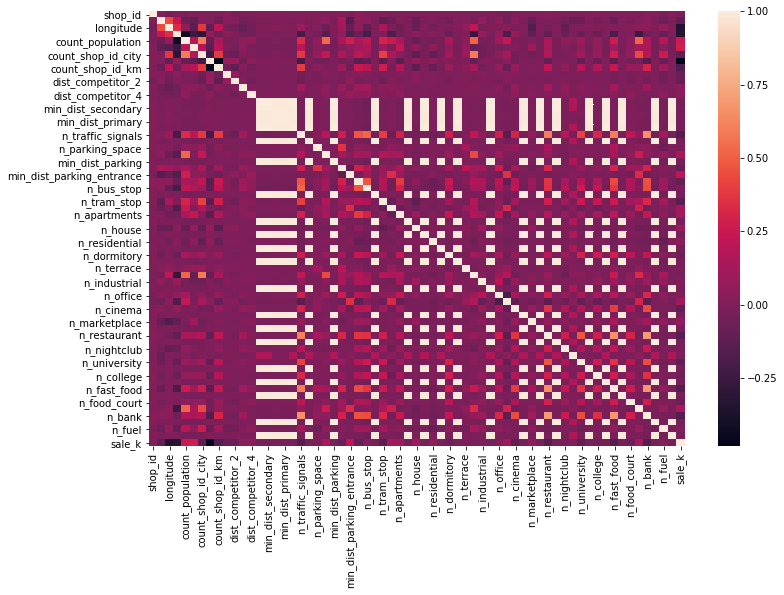

In [10]:
# Корреляционная матрица
data_corr=df.corr()

plt.figure(figsize = (12,8))
sns.heatmap(data_corr)

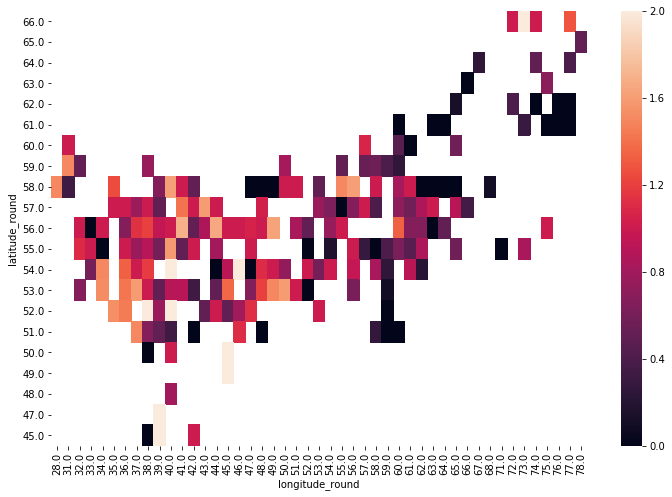

In [11]:
# Зависимость от долготы и широты
df_copy=df.copy()
df_copy['longitude_round']=np.round(df_copy['longitude'], 0)
df_copy['latitude_round']=np.round(df_copy['latitude'], 0)

plt.figure(figsize = (12,8))
sns.heatmap(df_copy.pivot_table('sale_k', index=['latitude_round'], 
                            columns=['longitude_round'],  aggfunc='mean').copy()
                                    .sort_values(by='latitude_round', ascending=False))



### Подготовка данных для обучения модели

In [12]:
# Разделение признаков и целевой переменной. Удаление неинформативных признаков.

X=df[[
        # city
        'latitude',
        'longitude',
        'distance_adm_cent',
        'count_population',
        'pop_dens',

        #shop
        'count_shop_id_city',
        'dist_shop_id',
        'count_shop_id_km',
        'dist_competitor_1',
        'dist_competitor_2',
        'dist_competitor_3',
        'dist_competitor_4',

        #road
        'min_dist_tertiary',
        'min_dist_secondary',
        'min_dist_road',
        'min_dist_primary',
        'min_dist_footway',
        'n_traffic_signals', 
        'min_dist_traffic_signals',
        'n_parking_space',
        'min_dist_parking_space',
        'min_dist_parking',
        'n_parking_entrance', 
        'min_dist_parking_entrance',
        'n_parking',
        'n_bus_stop', 
        'min_dist_bus_stop',
        'n_tram_stop', 
        'min_dist_tram_stop',

        #house
        'n_apartments', 
        'min_dist_apartments',
        'n_house', 
        'min_dist_house',
        'n_residential', 
        'min_dist_residential',
        'n_dormitory', 
        'min_dist_dormitory',
        'n_terrace', 
        'min_dist_terrace',
        'n_industrial', 
        'min_dist_industrial',

        #other building                         
        'n_office', 
        'min_dist_office',
        'n_cinema', 
        'min_dist_cinema',
        'n_marketplace', 
        'min_dist_marketplace',
        'n_restaurant', 
        'min_dist_restaurant',
        'n_nightclub', 
        'min_dist_nightclub',
        'n_university', 
        'min_dist_university',
        'n_college',
        'min_dist_college',
        'n_fast_food',
        'min_dist_fast_food', 
        'n_food_court', 
        'min_dist_food_court',
        'n_bank', 
        'min_dist_bank',
        'n_fuel',
        'min_dist_fuel'
    ]]

Y=df['sale_k']

In [59]:
# Нулевой признак смещения
X['a']=1

In [51]:
# Разделяем выборку на обучающую и тестовую

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=Y)

print(X_train.shape)
print(X_test.shape)

from collections import Counter
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

(2298, 64)
(575, 64)
Counter({1: 1240, 0: 1032, 2: 601})
Counter({1: 992, 0: 825, 2: 481})
Counter({1: 248, 0: 207, 2: 120})


In [109]:
# Масштабирование признаков

from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

print('Минимум и максимум обучающего набора: ', X_train_norm.min(), X_train_norm.max())
print('Минимум и максимум тестового набора: ', X_test_norm.min(), X_test_norm.max())

Минимум и максимум обучающего набора:  0.0 1.0
Минимум и максимум тестового набора:  -0.07597123023517281 3.316260795315216


<Figure size 432x288 with 0 Axes>

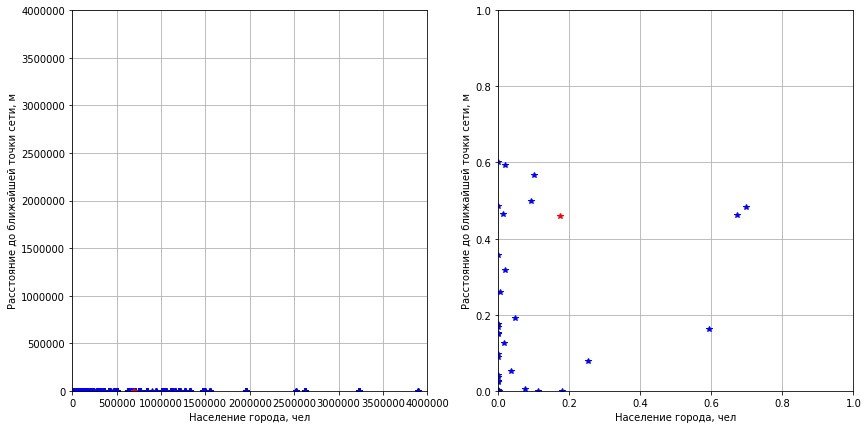

In [110]:
plt.figure()
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.plot(X_train['count_population'], X_train['dist_shop_id'], 'b*')
plt.plot(700000, 500, 'r*')
plt.xlim([0, 4000000])
plt.ylim([0, 4000000])
plt.xlabel('Население города, чел')
plt.ylabel('Расстояние до ближайшей точки сети, м')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(X_train_norm[3], X_train_norm[6], 'b*')
plt.plot(X_train['count_population'], X_train['dist_shop_id'], 'b*')
plt.plot(0.175, 0.46, 'r*')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Население города, чел')
plt.ylabel('Расстояние до ближайшей точки сети, м')
plt.grid()

### Базовое решение

In [16]:
# В качестве базового решения используем наиболее часто встречающийся класс

Pred_base = Y_test*0+1

### Метрики качества

In [17]:
# Правильность (какое количество меток класса совпадает с метками предсказания)

from sklearn.metrics import accuracy_score

np.round(accuracy_score(Y_test, Pred_base), 2)

0.43

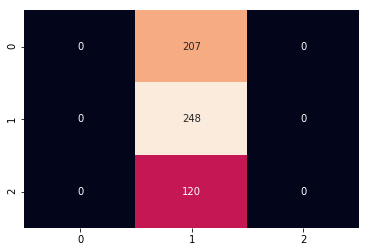

In [18]:
# Матрица ошибок

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y_test, Pred_base), annot=True, fmt="d", cbar=False)

In [19]:
# Точность и полнота классификационной модели

from sklearn.metrics import classification_report

print(classification_report(Y_test, Pred_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.43      1.00      0.60       248
           2       0.00      0.00      0.00       120

   micro avg       0.43      0.43      0.43       575
   macro avg       0.14      0.33      0.20       575
weighted avg       0.19      0.43      0.26       575



### Дерево решения

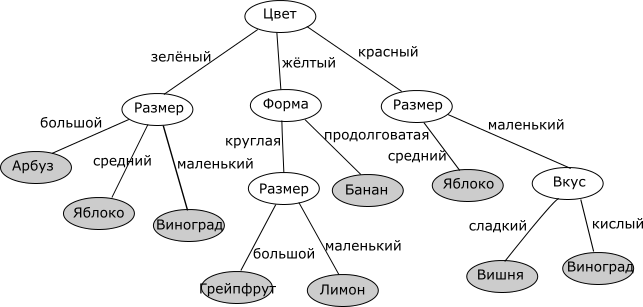

In [66]:
Image("tree.png")

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Дерево решений со стандартными параметрами

tree = DecisionTreeClassifier()

tree.fit(X_train_norm, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
# Предсказания
Pred_tree_train = tree.predict(X_train_norm)
Pred_tree_test = tree.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_tree_test), 2))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.72


In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names = X_train.columns) #print dotfile

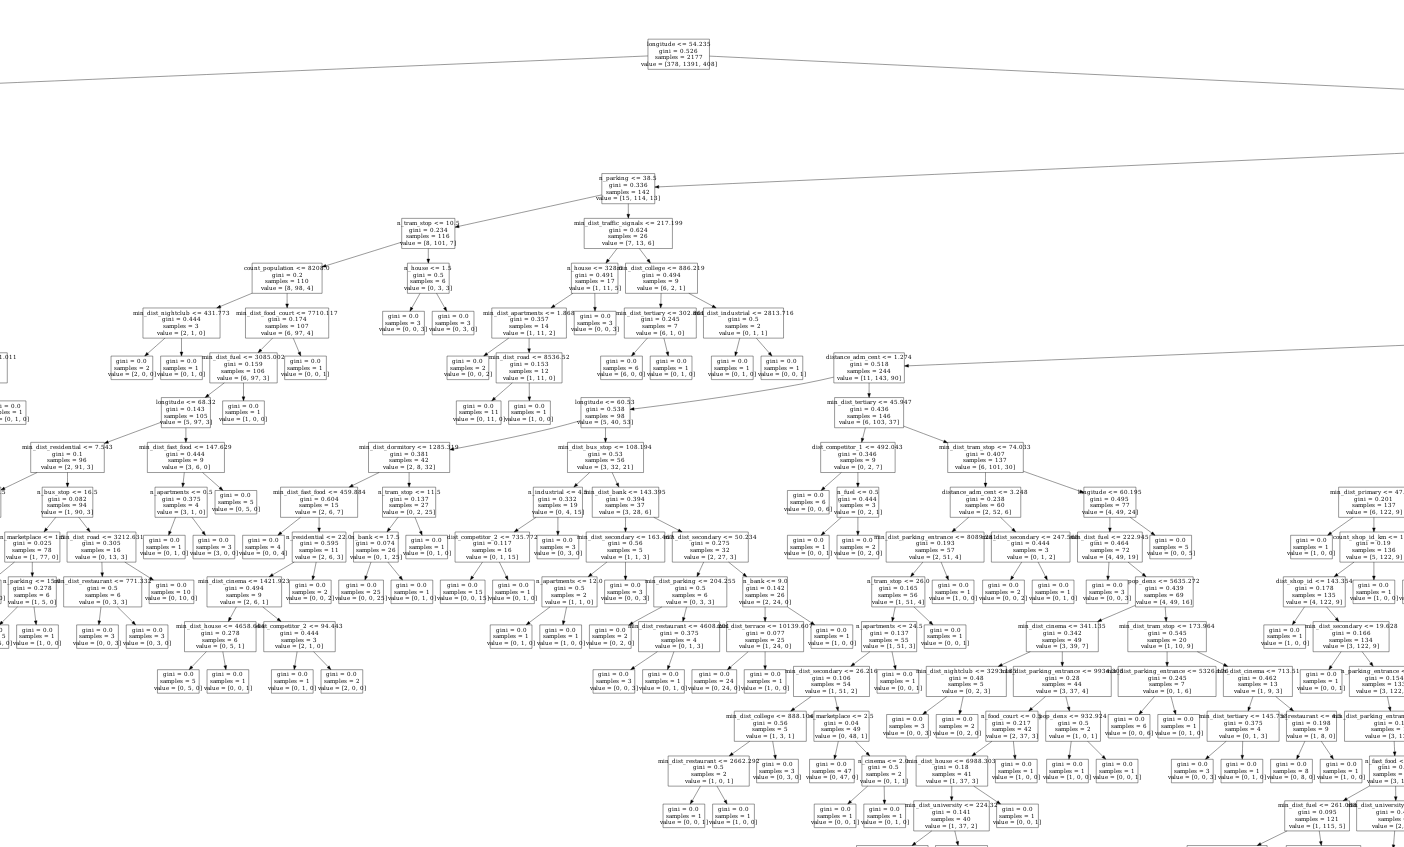

In [60]:
# http://www.webgraphviz.com/
Image("Webgraphviz.png")

In [25]:
# Дерево решений с установленными параметрами

tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train_norm, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
# Предсказания
Pred_tree_train = tree.predict(X_train_norm)
Pred_tree_test = tree.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_tree_test), 2))

Правильность на обучающем наборе:  0.83
Правильность на тестовом наборе:  0.74


In [27]:
export_graphviz(tree, out_file='tree.dot', feature_names = X_train.columns) #print dotfile

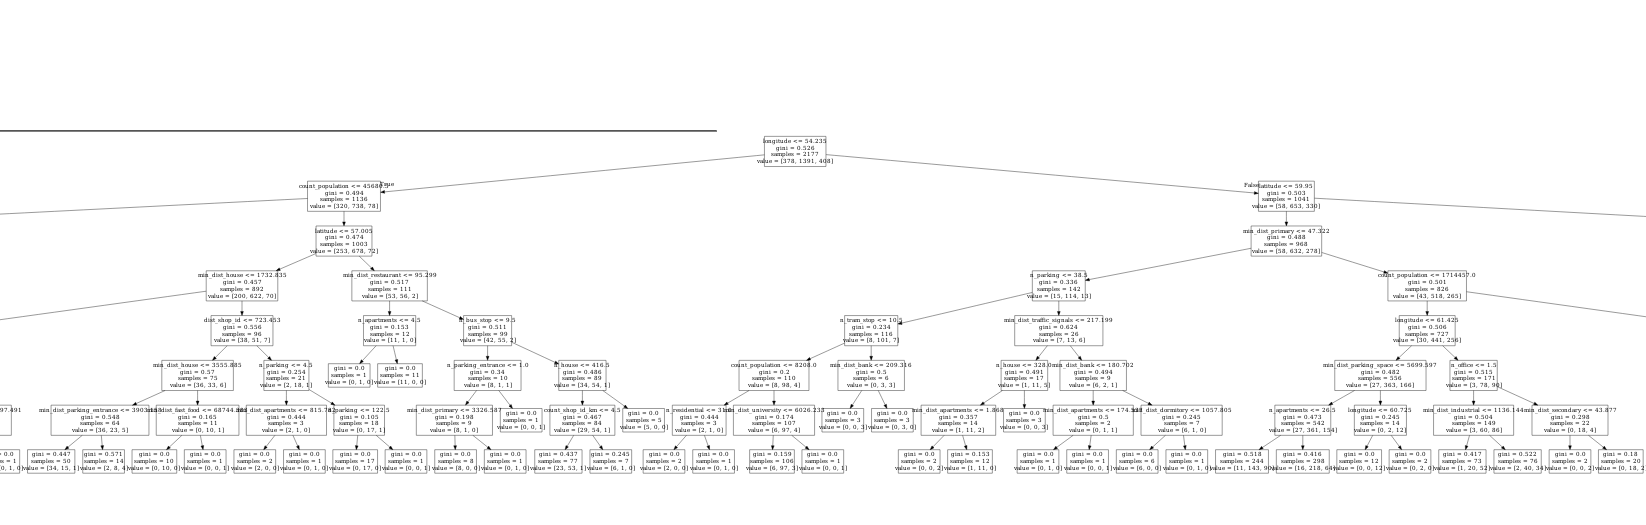

In [61]:
Image("Webgraphviz2.png")

In [29]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            }]

In [30]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_tree_train = grid_search.predict(X_train_norm)
Pred_tree_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_tree_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_tree_test), 2))

Правильность на обучающем наборе:  0.94
Правильность на тестовом наборе:  0.74


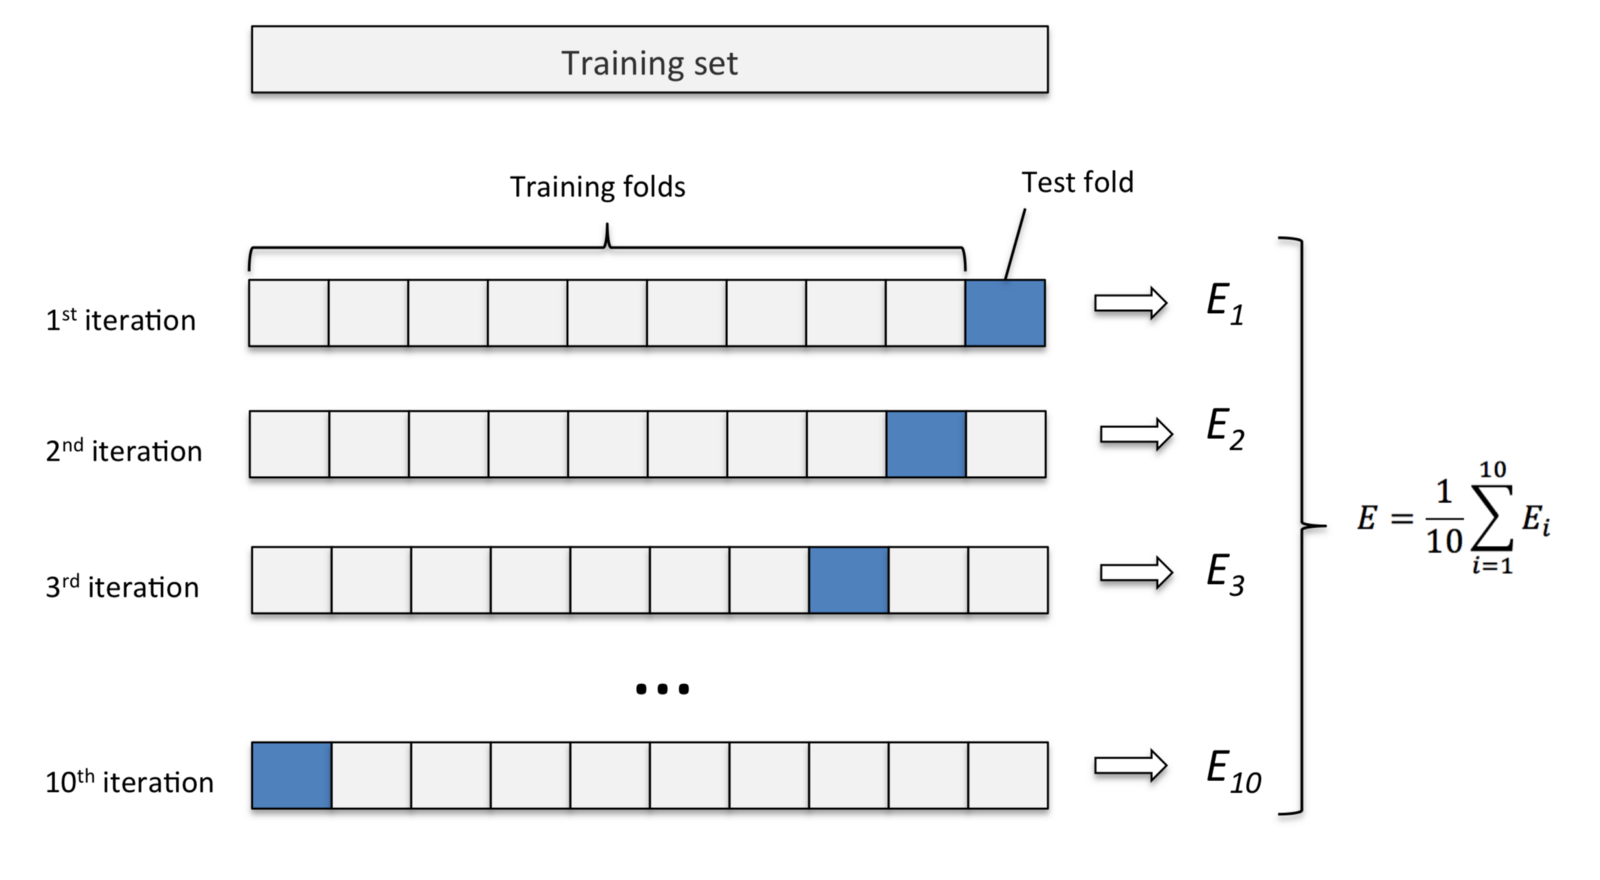

In [115]:
Image("кроссвалидация.png")

In [31]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 2}

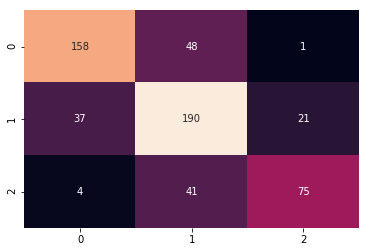

In [32]:
sns.heatmap(confusion_matrix(Y_test, Pred_tree_test), annot=True, fmt="d", cbar=False)

In [33]:
print(classification_report(Y_test, Pred_tree_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       207
           1       0.68      0.77      0.72       248
           2       0.77      0.62      0.69       120

   micro avg       0.74      0.74      0.74       575
   macro avg       0.75      0.72      0.73       575
weighted avg       0.74      0.74      0.74       575



In [34]:
# Значимость признаков

feature=pd.DataFrame(X_train.columns)
best_tree=grid_search.best_estimator_
feature['importances']=best_tree.feature_importances_
feature.sort_values(by='importances', ascending=False).head(10)

0  importances
6        dist_shop_id     0.246800
1           longitude     0.119114
7    count_shop_id_km     0.077643
3    count_population     0.057206
2   distance_adm_cent     0.047911
4            pop_dens     0.045754
17  n_traffic_signals     0.033006
38   min_dist_terrace     0.021274
12  min_dist_tertiary     0.020924
55        n_fast_food     0.019989

### К - ближайших соседей

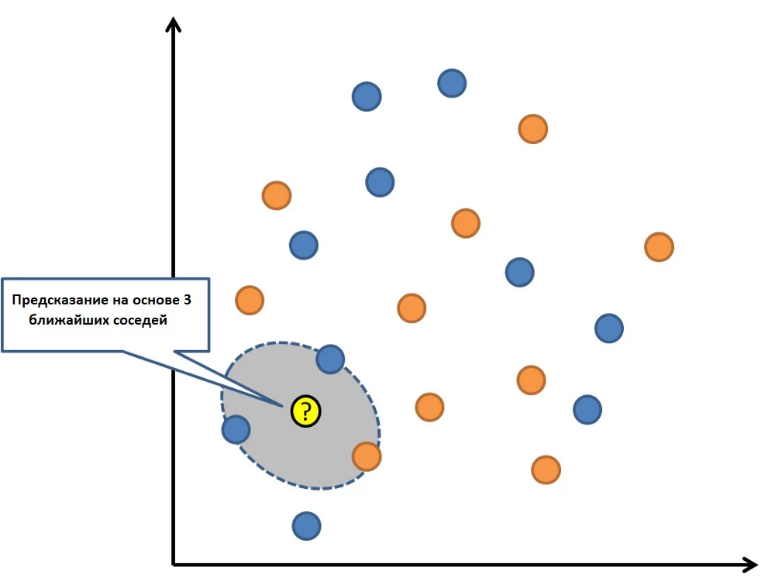

In [62]:
Image("k ближайших соседей.png")

In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier()

clf.fit(X_train_norm, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
# Предсказания
Pred_clf_train = clf.predict(X_train_norm)
Pred_clf_test = clf.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_clf_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_clf_test), 2))

Правильность на обучающем наборе:  0.83
Правильность на тестовом наборе:  0.72


In [38]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'n_neighbors':[1, 2, 3, 5, 10, 20, 30, 40, 50],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights':['uniform', 'distance']
            }]

clf=KNeighborsClassifier(n_neighbors=5)
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_clf_train = grid_search.predict(X_train_norm)
Pred_clf_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_clf_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_clf_test), 2))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.74


In [39]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

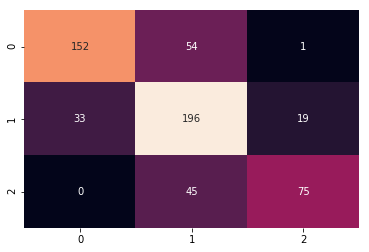

In [40]:
sns.heatmap(confusion_matrix(Y_test, Pred_clf_test), annot=True, fmt="d", cbar=False)

In [41]:
print(classification_report(Y_test, Pred_clf_test))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78       207
           1       0.66      0.79      0.72       248
           2       0.79      0.62      0.70       120

   micro avg       0.74      0.74      0.74       575
   macro avg       0.76      0.72      0.73       575
weighted avg       0.75      0.74      0.74       575



### Логистическая регрессия

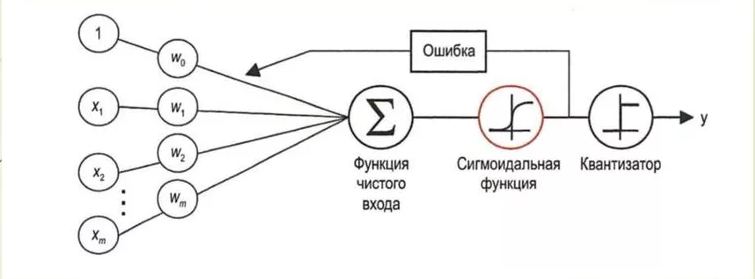

In [63]:
Image("логистическая регрессия.png")

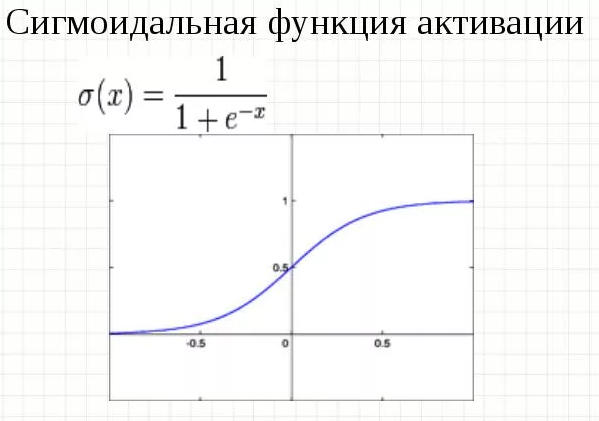

In [64]:
Image("сигмоидальная функция.png")

In [53]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train_norm, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Предсказания
Pred_lr_train = lr.predict(X_train_norm)
Pred_lr_test = lr.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_lr_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_lr_test), 2))

Правильность на обучающем наборе:  0.84
Правильность на тестовом наборе:  0.81


In [55]:
# Поиск оптимальных гиперпараметров по сетке

param_grid=[{
             'C':[0.1, 0.5, 0.75, 1, 10, 15, 50, 100],
             'max_iter':[1, 2, 3, 5, 10, 15, 20],
            }]

lr=LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=10)
grid_search.fit(X_train_norm, Y_train)

# Предсказания
Pred_lr_train = grid_search.predict(X_train_norm)
Pred_lr_test = grid_search.predict(X_test_norm)

print('Правильность на обучающем наборе: ', np.round(accuracy_score(Y_train, Pred_lr_train), 2))
print('Правильность на тестовом наборе: ', np.round(accuracy_score(Y_test, Pred_lr_test), 2))

Правильность на обучающем наборе:  0.9
Правильность на тестовом наборе:  0.86


In [56]:
grid_search.best_params_

{'C': 100, 'max_iter': 10}

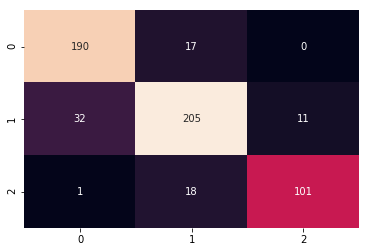

In [57]:
sns.heatmap(confusion_matrix(Y_test, Pred_lr_test), annot=True, fmt="d", cbar=False)

In [58]:
print(classification_report(Y_test, Pred_lr_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       207
           1       0.85      0.83      0.84       248
           2       0.90      0.84      0.87       120

   micro avg       0.86      0.86      0.86       575
   macro avg       0.87      0.86      0.86       575
weighted avg       0.86      0.86      0.86       575



### Домашнее задание

1. Реализовать алгоритм "Метод опорных векторов".
2. Реализовать алгоритм отбора признаков с целью улучшения качества работы модели (модель выбрать любую из представленных). Можно использовать уже готовые библиотеки или написать свою функцию.
3. Разобраться в представленных моделях. Выбрать модель с наилучшей точностью и полнотой и попытаться улучшить эти параметры с помощью отбора признаков, конструирования новых признаков, подбора гиперпараметров или другими способами.